Univerzitet u Sarajevu
<br> Elektrotehnički fakultet
#### **Predmet: Multimedijalni Sistemi**

# Laboratorijska vježba 09: Koraci JPEG kompresije

Za izradu laboratorijske vježbe treba koristiti odgovarajuću Jupyter Notebook datoteku. Urađenu vježbu je potrebno konvertirati u PDF format, a zatim je PDF datoteku potrebno predati do postavljenog roka koristeći platformu Zamger. 

Ime i prezime studenta, broj indeksa:

Amar Hasečić, 2116/18673

Datum izrade izvještaja:

22.05.2024

---

## Zadatak 1.

Za ovu vježbu je potrebno preuzeti testnu sliku <code>Vijecnica.bmp</code> koja se nalazi na C2 platformi neposredno ispod linka za ove vježbe. Ovu sliku  je potrebno pozicionirati u isti direktorij u kojem se izvodi *ipynb file*.

Potrebno je implementirati funkciju <code>JPEGKomp(B)</code> koja kao ulazni argument uzima blok dimenzija 8x8 koji prikazuje vrijednost intenziteta piksela luminantne komponente Y. Funkcija nad blokom B izvodi sljedeće korake JPEG kompresije: 

1. Od vrijednosti intenziteta piksela bloka B se prvo oduzima 128;

2. Nad blokom B se izvodi dvodimenzionalni DCT, što rezultira matricom <code>DCTKoef</code> koja sadrži DCT koeficijente. Za izvođenje 2D diskretne kosinusne transformacije (DCT) koristite funkciju <code>dct</code> iz modula *scipy.fftpack* <code>(from scipy. fftpack import dct)</code>. Dvodimenzionalnu DCT nad blokom B možete dobiti na sljedeći način: <code>dct(dct(B,  axis = 0, norm = 'ortho'), axis = 1, norm = 'ortho').astype(int)</code>. Primijetite da je funkcija <code>dct</code> pozvana dva puta imajući u vidu da jedan poziv ove funkcije izvodi DCT samo u jednoj dimenziji. Isto tako, primijetite da je napravljena konverzija u cjelobrojne vrijednosti.

3. Koristeći kvantizacijsku tabelu <code>Q</code> definiranu u kodu ispod izvesti kvantizaciju DCT koeficijenata na sljedeći način:

<code>QDCTKoef[i][j] = round(DCTKoef[i][j] / Q[i][j])</code>

Funkcija <code>JPEGKoraci(B)</code> kao ulazni argument prima blok *B* dimenzija 8x8 koji predstavlja intenzitet vrijednosti piksela luminantne komponente *Y*. Kao rezultat funkcija vraća dvije matrice: matricu DCT koeficijenata <code>DCTKoef</code> i matricu kvantiziranih DCT koeficijenata <code>QDCTKoef</code>.

Detaljan opis koraka JPEG kompresije možete naći u PDFmaterijalima na platformi C2 (poglavlje 6, str. 145-166).

**Rješenje:**

In [1]:
Q = [
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
]

Nakon implementacije funkcije, potrebno je izvesti programski kod ispod koji se odnosi na blok B1 tako da dobije prikazani ispis i grafički prikaz rezultata. Za izvođenje koda ispod biti će potrebno da imate instaliran modul CV2. Ako ovaj modul već nije instaliran, to možete napraviti npr. na sljedeći način: <code>pip install opencv-python</code>.

Testna slika - Crvenom bojom  označen blok B1. Zelenom bojom označen blok B2.


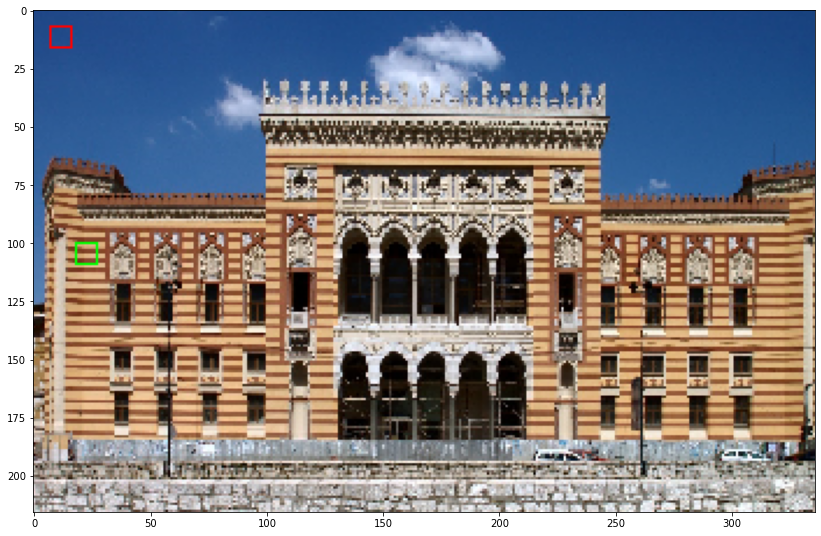



Grafički prikaz bloka B1:




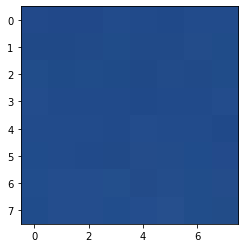

Vrijednosti intenziteta piksela luminantne komponente Y za blok B1:



[[68 67 67 70 69 68 70 70]

 [67 67 68 69 68 68 70 69]

 [70 68 69 68 67 69 68 69]

 [71 69 69 69 68 69 69 71]

 [70 70 70 69 71 70 70 68]

 [70 70 69 68 71 70 70 69]

 [71 72 72 72 70 71 70 71]

 [70 72 72 71 72 73 70 70]]



Grafički prikaz luminantne komponente Y za blok B1:




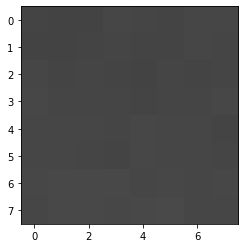



DCT koeficijenti Y komponente za blok B1:



[[-467    0    0    0    0    0    0    0]

 [  -8   -2    1    0    1    2    0    0]

 [   1   -1   -1   -1    0    0    0    0]

 [   0    0    0    0    0    0   -2    1]

 [   1    0    0    0    0    0    0    0]

 [   1    0    2   -1    1    0    0   -1]

 [  -1    0    0    1    0    0    0    0]

 [   0    1    0    0    0    0    0    0]]



Kvantizirani DCT koeficijenti Y komponente za blok B1:



[[-29   0   0   0   0   0   0   0]

 [ -1   0   0   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0]

 [  0   0   0   0   0   0   0   0]]


In [3]:
from matplotlib import image
from matplotlib import pyplot
import cv2

image = image.imread('Vijecnica.bmp')

#Označavanje bloka B1 crvenom bojom
height, width, channels = image.shape
pocetak1 = (7,7)
kraj1 = (16,16)
boja1 = (255,0,0)
debljina = 1
image = cv2.rectangle(image, pocetak1, kraj1, boja1, debljina)

#Označavanje bloka B2 zelenom bojom
pocetak2 = (18,100)
kraj2 = (27,109)
boja2 = (0,255,0)
image = cv2.rectangle(image, pocetak2, kraj2, boja2, debljina)

print("Testna slika - Crvenom bojom  označen blok B1. Zelenom bojom označen blok B2.")

pyplot.figure(figsize = (14,10))
pyplot.imshow(image)
pyplot.show()

# Blok B je definiran elementima slike pohranjene u matrici image sadržanim u rasponu:
# image[pocetak[1]+1:kraj[1],pocetak[0]+1:kraj[0]]
# Napomena: pocetak[1] uvećevamo za 1 jer pravokutnik koji označava blok nije sastavni dio bloka
B1=copy.deepcopy(image[pocetak1[1]+1:kraj1[1],pocetak1[0]+1:kraj1[0]])
print("\nGrafički prikaz bloka B1:\n")
pyplot.imshow(B1)
pyplot.show()

# Izračunavanje Y komponente bloka B1
R, G, B = B1[:,:,0], B1[:,:,1], B1[:,:,2]
B1Y = (0.2989 * R + 0.5870 * G + 0.1140 * B).astype(int)

print("Vrijednosti intenziteta piksela luminantne komponente Y za blok B1:\n")
print(B1Y)
print("\nGrafički prikaz luminantne komponente Y za blok B1:\n")
pyplot.imshow(B1Y,cmap='gray',vmin=0,vmax=255)
pyplot.show()

DCTKoef1,QDCTKoef1 = JPEGKomp(B1Y)
print("\nDCT koeficijenti Y komponente za blok B1:\n")
print(DCTKoef1)
print("\nKvantizirani DCT koeficijenti Y komponente za blok B1:\n")
print(QDCTKoef1)

Nadalje, potrebno je izvesti programski kod ispod koji se odnosi na blok B2 tako da dobije prikazani ispis i grafički prikaz rezultata. Osim toga, potrebno je dodati i testiranje za **proizvoljno odabrani blok B3** koji na testnoj slici prikazanoj iznad treba biti označen **plavom bojom**. Rezultati testa za blok B3 trebaju imati iste elemente kao i testovi za blokove B1 i B2.



Grafički prikaz bloka B2:




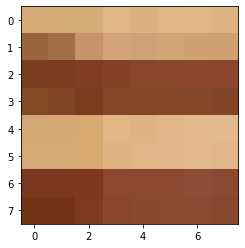

Vrijednosti intenziteta piksela luminantne komponente Y za blok B2:



[[177 178 179 188 185 188 190 187]

 [111 121 157 173 171 172 169 168]

 [ 76  75  77  81  85  86  87  87]

 [ 86  82  74  83  84  84  84  83]

 [175 174 175 190 186 189 192 193]

 [176 177 176 186 188 189 191 189]

 [ 72  72  74  90  89  89  93  89]

 [ 67  67  74  86  89  90  89  86]]



Grafički prikaz luminentne komponente Y za blok B2:




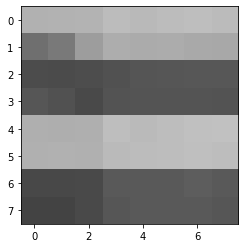



DCT koeficijenti Y komponente za blok B2:



[[  12  -56  -23    1    7    8   -3   -5]

 [ 118   -4   -7   -6   -2    0    4    1]

 [ -16  -14  -14   -4   -2    2    2    1]

 [ 323    1    3   -1    0    1   -2   -2]

 [  27   15   12    5    1    0   -2   -2]

 [-166   25   19    9    0   -2   -5   -1]

 [  34   17   15    6   -2   -4   -1    0]

 [  -7    2    6    0    0    0   -1    0]]



Kvantizirani DCT koeficijenti Y komponente za blok B2:



[[ 1 -5 -2  0  0  0  0  0]

 [10  0  0  0  0  0  0  0]

 [-1 -1 -1  0  0  0  0  0]

 [23  0  0  0  0  0  0  0]

 [ 2  1  0  0  0  0  0  0]

 [-7  1  0  0  0  0  0  0]

 [ 1  0  0  0  0  0  0  0]

 [ 0  0  0  0  0  0  0  0]]


In [4]:

B2=copy.deepcopy(image[pocetak2[1]+1:kraj2[1],pocetak2[0]+1:kraj2[0]])

print("\nGrafički prikaz bloka B2:\n")
pyplot.imshow(B2)
pyplot.show()

# Izračunavanje Y komponente bloka B2
R, G, B = B2[:,:,0], B2[:,:,1], B2[:,:,2]
B2Y = (0.2989 * R + 0.5870 * G + 0.1140 * B).astype(int)

print("Vrijednosti intenziteta piksela luminantne komponente Y za blok B2:\n")
print(B2Y)
print("\nGrafički prikaz luminentne komponente Y za blok B2:\n")
pyplot.imshow(B2Y,cmap='gray',vmin=0,vmax=255)
pyplot.show()

DCTKoef2,QDCTKoef2 = JPEGKomp(B2Y)
print("\nDCT koeficijenti Y komponente za blok B2:\n")
print(DCTKoef2)
print("\nKvantizirani DCT koeficijenti Y komponente za blok B2:\n")
print(QDCTKoef2)